In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
col_waste=['Surname','RowNumber','CustomerId']
df.drop(columns=col_waste, axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.shape

(10000, 11)

In [7]:
for col in df:
    if col !='CreditScore':
        print(f'{col} : {df[col].unique()}')

Geography : ['France' 'Spain' 'Germany']
Gender : ['Female' 'Male']
Age : [42 41 39 43 44 50 29 27 31 24 34 25 35 45 58 32 38 46 36 33 40 51 61 49
 37 19 66 56 26 21 55 75 22 30 28 65 48 52 57 73 47 54 72 20 67 79 62 53
 80 59 68 23 60 70 63 64 18 82 69 74 71 76 77 88 85 84 78 81 92 83]
Tenure : [ 2  1  8  7  4  6  3 10  5  9  0]
Balance : [     0.    83807.86 159660.8  ...  57369.61  75075.31 130142.79]
NumOfProducts : [1 3 2 4]
HasCrCard : [1 0]
IsActiveMember : [1 0]
EstimatedSalary : [101348.88 112542.58 113931.57 ...  42085.58  92888.52  38190.78]
Exited : [1 0]


In [8]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
df['Age'] = df['Age']/100
df['Tenure'] = df['Tenure']/10

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,0.42,0.2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,0.41,0.1,83807.86,1,0,1,112542.58,0
2,502,France,Female,0.42,0.8,159660.80,3,1,0,113931.57,1
3,699,France,Female,0.39,0.1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,0.43,0.2,125510.82,1,1,1,79084.10,0


In [11]:
col_corr = ['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']
df[col_corr].corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


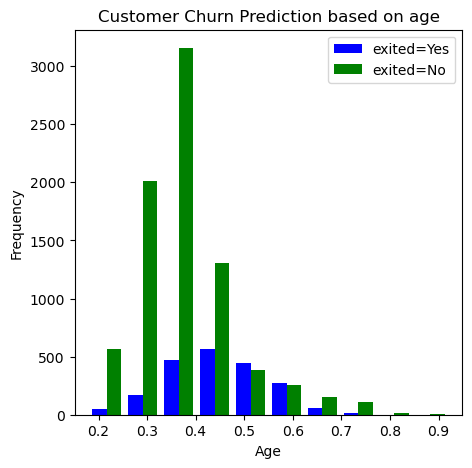

In [12]:
not_exited  = df[df.Exited==0].Age
yes_exited  = df[df.Exited==1].Age

plt.figure(figsize = (5,5))
plt.hist([yes_exited,not_exited], color= ('blue','green'), label=['exited=Yes','exited=No']) 
plt.xlabel('Age')
plt.title('Customer Churn Prediction based on age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

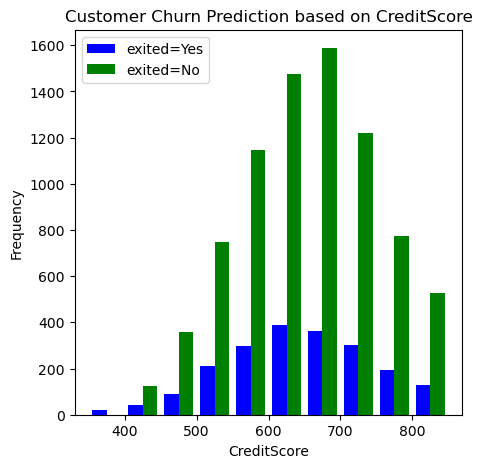

In [13]:
not_exited  = df[df.Exited==0].CreditScore
yes_exited  = df[df.Exited==1].CreditScore

plt.figure(figsize = (5,5))
plt.hist([yes_exited,not_exited], color= ('blue','green'), label=['exited=Yes','exited=No']) 
plt.xlabel('CreditScore')
plt.title('Customer Churn Prediction based on CreditScore')
plt.ylabel('Frequency')
plt.legend()
plt.show()

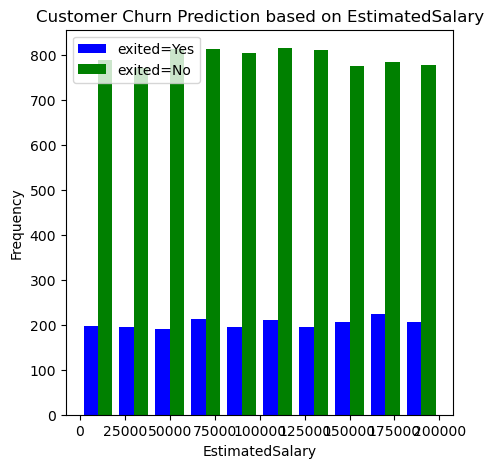

In [14]:
not_exited  = df[df.Exited==0].EstimatedSalary
yes_exited  = df[df.Exited==1].EstimatedSalary

plt.figure(figsize = (5,5))
plt.hist([yes_exited,not_exited], color= ('blue','green'), label=['exited=Yes','exited=No']) 
plt.xlabel('EstimatedSalary')
plt.title('Customer Churn Prediction based on EstimatedSalary')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [15]:
df1=df
df1.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [16]:
# replace Females and Males with 1 and 0 in Gender column
df1['Gender'].replace({'Female' : 1, 'Male': 0}, inplace = True)

In [18]:
# One hot Encoding
col_dummies= ['Geography', 'NumOfProducts']
df2 = pd.get_dummies(df1, columns=col_dummies)
df2.replace({True : 1, False : 0}, inplace=True)
df2.head()

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,619,1,0.42,0.2,0.00,1,1,101348.88,1,1,0,0,1,0,0,0
1,608,1,0.41,0.1,83807.86,0,1,112542.58,0,0,0,1,1,0,0,0
2,502,1,0.42,0.8,159660.80,1,0,113931.57,1,1,0,0,0,0,1,0
3,699,1,0.39,0.1,0.00,0,0,93826.63,0,1,0,0,0,1,0,0
4,850,1,0.43,0.2,125510.82,1,1,79084.10,0,0,0,1,1,0,0,0


In [19]:
df2.dtypes

CreditScore            int64
Gender                 int64
Age                  float64
Tenure               float64
Balance              float64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       int64
Geography_Germany      int64
Geography_Spain        int64
NumOfProducts_1        int64
NumOfProducts_2        int64
NumOfProducts_3        int64
NumOfProducts_4        int64
dtype: object

In [20]:
#scale the columns CreditScore, EstimatedSalary, Balance
from sklearn.preprocessing import MinMaxScaler
cols_to_scale=['CreditScore', 'EstimatedSalary', 'Balance']
scaler=MinMaxScaler()
df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])
df2.head()

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,0.538,1,0.42,0.2,0.000000,1,1,0.506735,1,1,0,0,1,0,0,0
1,0.516,1,0.41,0.1,0.334031,0,1,0.562709,0,0,0,1,1,0,0,0
2,0.304,1,0.42,0.8,0.636357,1,0,0.569654,1,1,0,0,0,0,1,0
3,0.698,1,0.39,0.1,0.000000,0,0,0.469120,0,1,0,0,0,1,0,0
4,1.000,1,0.43,0.2,0.500246,1,1,0.395400,0,0,0,1,1,0,0,0


In [22]:
#Train Test split
x=df2.drop('Exited',axis=1)
y=df2['Exited']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [23]:
x_train.shape

(8000, 15)

In [25]:
x_test.shape

(2000, 15)

In [31]:
#model
model = keras.Sequential([
    keras.layers.Dense(15, input_shape = (15,), activation = 'relu'),
    keras.layers.Dense(20, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])
model.compile(optimizer = 'Adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4752 - accuracy: 0.7949
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4296 - accuracy: 0.8065
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4127 - accuracy: 0.8211
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3996 - accuracy: 0.8290
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3910 - accuracy: 0.8298
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3845 - accuracy: 0.8339
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3780 - accuracy: 0.8379
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3754 - accuracy: 0.8374
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3720 - accuracy: 0.8424
Epoch 10/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3709 - accura

250/250 [==============================] - 1s 3ms/step - loss: 0.3320 - accuracy: 0.8625
Epoch 82/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3314 - accuracy: 0.8629
Epoch 83/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3310 - accuracy: 0.8629
Epoch 84/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3313 - accuracy: 0.8637
Epoch 85/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3312 - accuracy: 0.8640
Epoch 86/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3304 - accuracy: 0.8621
Epoch 87/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3308 - accuracy: 0.8639
Epoch 88/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3308 - accuracy: 0.8649
Epoch 89/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3297 - accuracy: 0.8625
Epoch 90/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3299 - accuracy: 

In [33]:
model.evaluate(x_test,y_test)

63/63 [==============================] - 0s 3ms/step - loss: 0.3297 - accuracy: 0.8695


[0.3296831548213959, 0.8694999814033508]

In [34]:
yp = model.predict(x_test)
yp[0:5]

63/63 [==============================] - 0s 1ms/step


array([[0.39988056],
       [0.06452539],
       [0.04476408],
       [0.3074928 ],
       [0.08736245]], dtype=float32)

In [36]:
y_pred = []
for i in yp:
    if i > 0.5 :
        y_pred.append(1)
    else:
        y_pred.append(0)
        
y_pred[0:5]

[0, 0, 0, 0, 0]

In [37]:
y_test[0:5]

1603    0
8713    0
4561    0
6600    1
2558    0
Name: Exited, dtype: int64

In [39]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1604
           1       0.73      0.55      0.62       396

    accuracy                           0.87      2000
   macro avg       0.81      0.75      0.77      2000
weighted avg       0.86      0.87      0.86      2000



Text(95.72222222222221, 0.5, 'Truth')

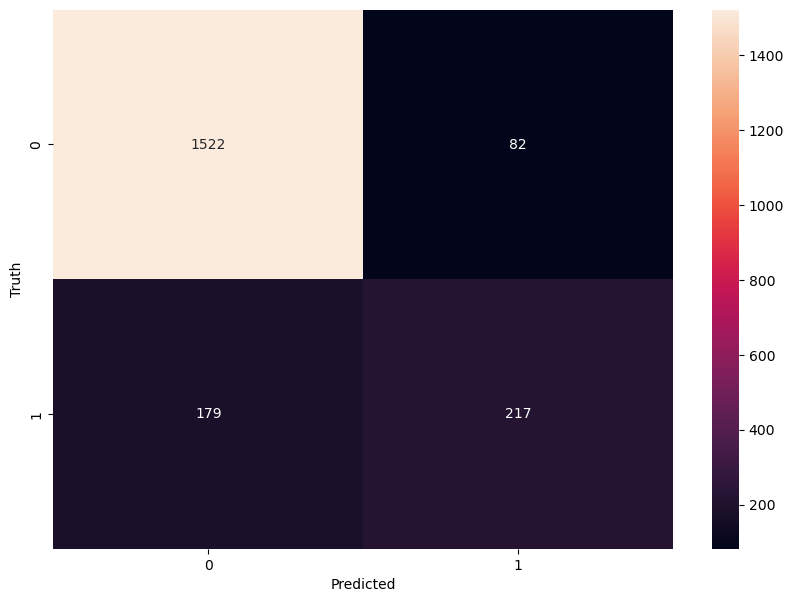

In [40]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')